<a href="https://colab.research.google.com/github/LeNoRaV/MathStat-Lab5/blob/main/%D0%94%D0%975_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача №5 Проверка гипотез  о параметрах нормального распределения

In [17]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable

np.set_printoptions(precision=3, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

In [8]:
df = pd.read_csv('ДЗ5.csv',delimiter=';',header=None)
x = df.to_numpy()
print("Выборка (вариант 10) \n", x)

Выборка (вариант 10) 
 [[-15.754  -5.357  -5.177  -7.58   -0.929 -13.199  -8.135   0.323  -8.631
   -1.297]
 [-10.437  -3.874  -8.748  -8.036  -7.85  -11.149 -12.184  -7.747  -3.767
    1.761]
 [-11.87    0.823  -1.097  -8.208 -12.289  -8.661  -2.067  -7.831  -4.29
   -7.062]
 [ -3.571 -12.35  -10.295  -8.066  -1.334  -2.598  -7.224  -5.336  -7.22
   -7.747]
 [ -6.725  -4.637  -5.206  -8.816 -11.586 -14.533 -10.135  -9.516  -5.503
   -9.966]
 [ -8.782 -10.151  -5.609  -5.025  -8.187  -7.44   -5.41   -9.567  -6.365
   -9.776]
 [-12.632  -6.32   -7.54   -1.798  -9.049 -10.221  -2.571 -10.856  -5.774
   -7.42 ]
 [-11.878  -2.76   -0.8    -7.944  -6.091   0.113  -3.328 -10.045  -7.386
   -4.706]
 [-10.041  -9.209  -4.214  -9.859  -4.108  -3.329   2.647  -8.015  -8.397
   -7.12 ]
 [ -4.833  -5.303 -14.177  -4.619 -15.765  -8.972  -0.772 -17.609  -3.698
   -1.299]
 [ -1.904  -6.024  -7.803  -5.757  -0.452  -7.508  -3.84   -7.814  -5.63
   -5.21 ]
 [ -2.536  -7.717  -5.87   -4.508  -3.493 -10

In [18]:
n = x.size
Max = np.amax(x)
Min = np.amin(x)
w = Max - Min

print("Размер n = %d\nКрайние члены вариационного ряда max = %.3f, min = %.5f\nРазмах выборки w = %f" 
      %(n, Max, Min, w))

Размер n = 120
Крайние члены вариационного ряда max = 2.647, min = -17.60900
Размах выборки w = 20.256000


In [19]:
l = math.trunc(1 + math.log2(n))
h = w / l

print("Число интервалов l = %d\nШаг(ширина интервалов группировки) h = %f" %(l, h))

hist, bin_edges = np.histogram(x, l)
bin_edges_average = np.zeros(bin_edges[:7].size)
for i in range (l):
    bin_edges_average[i] = (bin_edges[i] + bin_edges[i + 1]) / 2 
f1 = bin_edges_average
f2 = hist

print("\n")
th = ["Cредние значения каждого из  интервалов", "Частоты попадания элементов в каждый из интервалов"]
td = np.array(f1[0])
for i in range(len(f1)-1):
    td = np.append(td, f2[i])
    td = np.append(td, f1[i+1])
td = np.append(td, f2[6])
print_table(th, td)

p = hist / n

Int = f1
intl = Int - h / 2
intl = np.append(intl, Max)

print("\n")
th = ["Интервал", "Середина интервала int", "Частота f2", "Относительная частота p"]
td = []
for i in range(l):
    td.append("["+str(round(intl[i], 4))+","+str(round(intl[i + 1], 4))+")")
    td.append(round(Int[i], 4))
    td.append(f2[i])
    td.append(round(p[i], 4))
print_table(th, np.array(td))

Число интервалов l = 7
Шаг(ширина интервалов группировки) h = 2.893714


+-----------------------------------------+----------------------------------------------------+
| Cредние значения каждого из  интервалов | Частоты попадания элементов в каждый из интервалов |
+-----------------------------------------+----------------------------------------------------+
|            -16.16214285714286           |                        3.0                         |
|           -13.268428571428574           |                        9.0                         |
|           -10.374714285714287           |                        20.0                        |
|            -7.481000000000002           |                        36.0                        |
|            -4.587285714285716           |                        31.0                        |
|           -1.6935714285714303           |                        16.0                        |
|            1.2001428571428565           |           

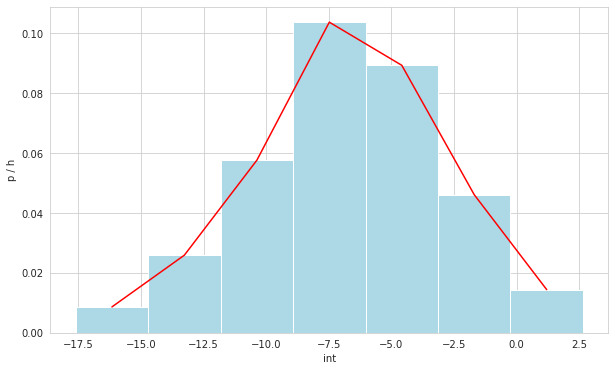

In [20]:
sb.set_style("whitegrid")
plt.figure(figsize=(10,6))
X = Int
Y = p / h
plt.bar(X, Y, width=h, color='lightblue')
plt.plot(X, Y, color='red')
plt.xlabel("int")
plt.ylabel("p / h")
plt.show()

In [21]:
xm = sum(x[i, j] for i in range(np.shape(x)[0]) for j in range(np.shape(x)[1])) / n
s2 = sum((x[i, j] - xm) ** 2 for i in range(np.shape(x)[0]) for j in range(np.shape(x)[1])) / (n - 1)
print("Выброчное среднее xm =", round(xm, 5))
print("Выборочная дисперсия s2 =", round(s2, 5))

Выброчное среднее xm = -6.73672
Выборочная дисперсия s2 = 14.95452


1) постройте критерий S_2 уровня α и проверьте гипотезу H_0: a=a_0  против  односторонней альтернативы  H_2, если σ неизвестно;

Вар	10

α	0.1

a_0	-6.8

H_2:	a>a_0

σ_0	3.2

H_3: σ>σ_0

H_1: a=a_1=-6.2

σ_1	3.4

ε	0.15

n 120

In [23]:
alpha = 0.1
a_0 = -6.8
a_1 = -6.2
sigma_0 = 3.2
sigma_1 = 3.4
epsilon = 0.15

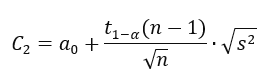

In [29]:
t_1_alpha = sp.stats.t.ppf(1-alpha, n-1)
print("t_1_alpha =", round(t_1_alpha, 5))
c2 = a_0+(t_1_alpha)/math.sqrt(n)*math.sqrt(s2)
print("C_2 =", round(c2, 5))

t_1_alpha = 1.28871
C_2 = -6.34506


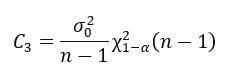

In [28]:
chisquare_1_alpha = sp.stats.chi2.ppf((1-alpha), n-1)
print("chisquare_1_alpha =", round(chisquare_1_alpha, 5))
c3 = (sigma_0*sigma_0)/(n-1)*chisquare_1_alpha
print("C_3 =", round(c3, 5))

chisquare_1_alpha = 139.14946
C_3 = 11.97387


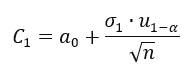

In [27]:
norm_1_alpha = sp.stats.norm.ppf(1-alpha)
print("norm_1_alpha =", round(norm_1_alpha, 5))
c1 = a_0+(sigma_1*norm_1_alpha)/math.sqrt(n)
print("C_1 =", round(c1, 5))

norm_1_alpha = 1.28155
C_1 = -6.40224


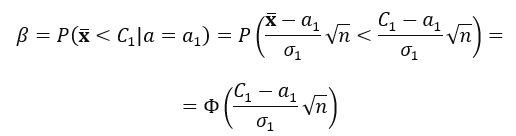

In [32]:
beta = sp.stats.norm.pdf(c1*n,a_1*n,sigma_1*math.sqrt(n))
print("beta =", round(beta, 5))

beta = 0.00866


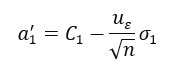

In [34]:
norm_epsilon = sp.stats.norm.ppf(epsilon)
print("norm_epsilon =", round(norm_epsilon, 5))
a_1_line=c1-norm_epsilon/math.sqrt(n)*sigma_1
print("a_1_line =", round(a_1_line, 5))

norm_epsilon = -1.03643
a_1_line = -6.08055


Строим совмещенные графики



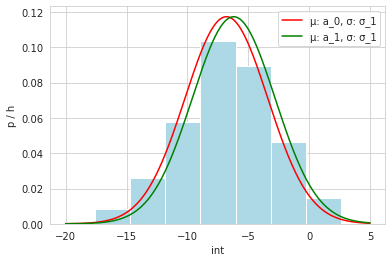

In [43]:
print("Строим совмещенные графики\n")
xx = np.arange (-20, 5, 0.001)
p_norm0 = sp.stats.norm.pdf(xx,a_0,sigma_1)
p_norm1 = sp.stats.norm.pdf(xx,a_1,sigma_1)
sb.set_style("whitegrid")
plt.plot(xx, p_norm0, color='red',label='μ: a_0, σ: σ_1')
plt.plot(xx, p_norm1, color='green',label='μ: a_1, σ: σ_1')
X_0 = Int
Y_0 = p / h
plt.bar(X_0, Y_0, width=h, color='lightblue')
plt.xlabel("int")
plt.ylabel("p / h")
plt.legend() 
plt.show()